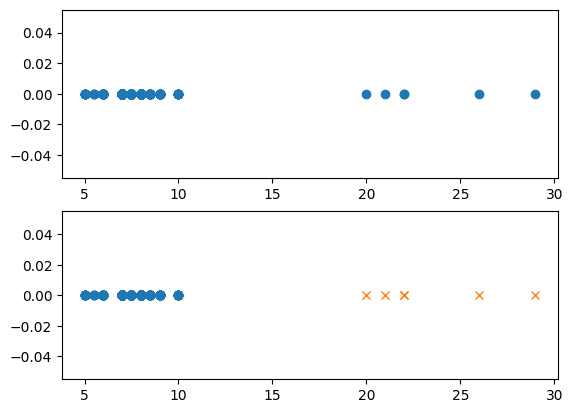

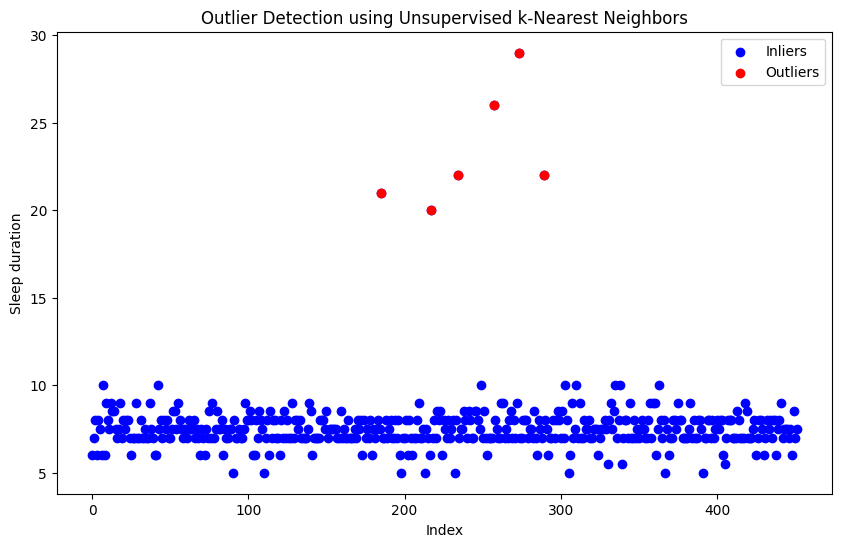

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def detect_anomaly(data_array, k=2):
    #k = k
    datapoint = []
    anomaly = []
    for i in range(len(data_array)):
        mean = 0
        distances = []
        for j in range(len(data_array)):
            if i == j: continue
            dist = data_array[j] - data_array[i]
            distances.append(abs(dist))

        distances.sort()
        kmin = distances[0:k]

        for j in range(len(kmin)):
            mean += kmin[j]
        mean = mean / len(kmin)
        #print(mean)
        anomaly.append(data_array[i]) if mean > 0 else datapoint.append(data_array[i])

    return datapoint, anomaly

# Load data from Excel file
data = pd.read_csv("/content/outliers.csv")

d = list(data["Sleep duration"])
datapoint, anomaly = detect_anomaly(d)
val = 0

plt.figure(1)
plt.subplot(211)
plt.plot(d, np.zeros_like(d) + val, 'o')  # plotting the original data
plt.subplot(212)
plt.plot(datapoint, np.zeros_like(datapoint) + val, 'o') # plotting the original data
plt.plot(anomaly, np.zeros_like(anomaly) + val, 'x')  # plotting anomalies
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(range(len(d)), d, c='b', label='Inliers')
plt.scatter(outlier_indices, outliers, c='r', label='Outliers')
plt.xlabel('Index')
plt.ylabel('Sleep duration')
plt.title('Outlier Detection using Unsupervised k-Nearest Neighbors')
plt.legend()
plt.show()